In [ ]:
"""
ДЗ 1. Курс Stepic. Множественная Регрессия в Python.

Пишу экзамен и пробы.
"""

In [1]:
import numpy as np
import pandas as pd

# fmt: off
# isort: skip_file        
# pyupgrade: disable      
# pylint: skip-file       
# flake8: noqa           
# mypy: ignore-errors     
# codespell:disable

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
class MatrixLinearRegression:
    """Реализация вручную линейной регрессии методом нормального уравнения."""
    
    def fit(self, X, y):
        """Обучение модели."""        
        X = np.insert(X, 0, 1, axis=1)   # add ones vector
        XT_X_inv = np.linalg.inv(X.T @ X)   # (X.T * X) ** (-1) inverse matrix
        weights = np.linalg.multi_dot([XT_X_inv, X.T, y])   # XT_X_inv * X.T * y
        self.bias, self.weights = weights[0], weights[1:]

    def predict(self, X_test):
        """Предсказание."""
        return X_test @ self.weights + self.bias

In [6]:
# df_path = "multiple_linear_regression_dataset.csv"
df_path = "data/multiple_linear_regression_dataset.csv"

income = pd.read_csv(df_path)
X1, y1 = income.iloc[:, :-1].values, income.iloc[:, -1].values
X1_scaled = scale(X1)

# print(X1_scaled)

X1_train, X1_test, y1_train, y1_test     = train_test_split(X1,        y1, random_state=None)
X1_train_s, X1_test_s, y1_train, y1_test = train_test_split(X1_scaled, y1, random_state=None)

print(X1_train_s)

correlation_matrix = income.corr()
correlation_matrix.style.background_gradient(cmap='coolwarm')

[[ 0.75200916 -1.04478905]
 [-1.70353096 -1.29354835]
 [-0.98733176 -0.79602975]
 [ 1.87746506  2.68660041]
 [-1.1919601  -0.29851116]
 [ 1.46820837 -0.29851116]
 [ 1.16126585 -0.54727045]
 [-1.49890262 -1.29354835]
 [ 0.34275248  0.94528533]
 [ 0.44506665  1.44280393]
 [-0.68038924 -0.54727045]
 [-0.78270342 -0.29851116]
 [ 0.13812413 -0.04975186]
 [-1.08964593 -1.29354835]
 [ 0.75200916  0.69652603]]


,age,experience,income
age,1.000000,0.615165,0.532204
experience,0.615165,1.000000,0.984227
income,0.532204,0.984227,1.000000


In [8]:
matrix_linear_regression = MatrixLinearRegression()
matrix_linear_regression.fit(X1_train_s, y1_train)
matrix_lr_pred_res = matrix_linear_regression.predict(X1_test_s)

mse = mean_squared_error(y1_test,matrix_lr_pred_res)**0.5
print(f'{mse}')

r2 = r2_score(y1_test, matrix_lr_pred_res)
print(f'{r2}')

1368.297190192385
0.782937677536296


In [15]:
sk_linear_regression = LinearRegression()
sk_linear_regression.fit(X1_train, y1_train)

sk_lr_pred_res = sk_linear_regression.predict(X1_test)
# sk_lr_r2 = r2_score(ИГРЕК_ТРУ, ИГРЕК_ПРЕД)
sk_lr_r2 = r2_score(y1_test, matrix_lr_pred_res)

print(y1_test)
# print(y1_test - sk_lr_pred_res)
print(f"sk_lr_r2 {sk_lr_r2}")
# sk_lr_mae = МАЕ(ИГРЕК_ТРУ, ИГРЕК_ПРЕД)
# sk_lr_mse = МСЕ(ИГРЕК_ТРУ, ИГРЕК_ПРЕД) ** корень
sk_lr_mse = mean_squared_error(y1_test, sk_lr_pred_res)**0.5
print(f"sk_lr_mse {sk_lr_mse}")

# print(f'weights: {sk_linear_regression.intercept_, *sk_linear_regression.coef_}')
# print(f'prediction: {sk_lr_pred_res}', '\n')

sk_linear_regression.fit(X1_train_s, y1_train)
print(f'scaled weights: {sk_linear_regression.intercept_, *sk_linear_regression.coef_}')
# sk_lr_pred_fit = sk_linear_regression.predict(X1_test_s)
# sk_lr_pred_fit

[41630 44190 48700 45150 40250]
sk_lr_r2 0.782937677536296
sk_lr_mse 7048.408149093488
scaled weights: (40759.336239304306, -1015.7142475265285, 8850.565031319122)


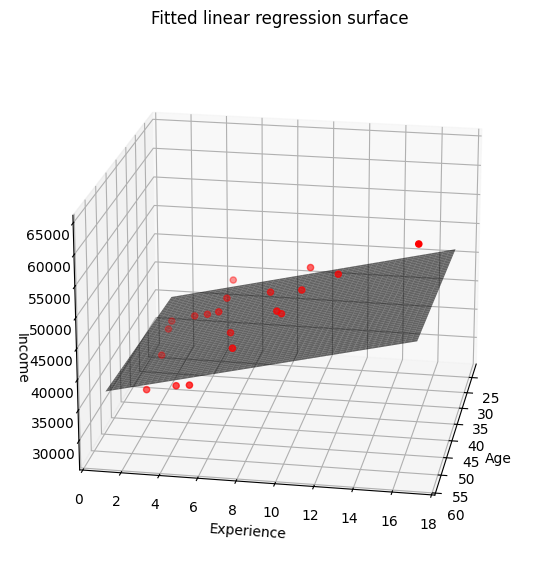

In [10]:
feature1, feature2 = X1[:, 0], X1[:, 1]
X1_linspace = np.linspace(feature1.min(), feature1.max())
X2_linspace = np.linspace(feature2.min(), feature2.max())
X1_surface, X2_surface = np.meshgrid(X1_linspace, X2_linspace)
X_surfaces = np.array([X1_surface.ravel(), X2_surface.ravel()]).T

sk_linear_regression = LinearRegression()
sk_linear_regression.fit(X1_train, y1_train)
y_surface = sk_linear_regression.predict(X_surfaces).reshape(X1_surface.shape)

fig = plt.figure(figsize=(9, 7))
ax = plt.axes(projection='3d')
ax.scatter(feature1, feature2, y1, color='red', marker='o')
ax.plot_surface(X1_surface, X2_surface, y_surface, color='black', alpha=0.6)
plt.title('Fitted linear regression surface')
ax.set_xlabel('Age')
ax.set_ylabel('Experience')
ax.set_zlabel('Income')
ax.view_init(20, 10)
plt.show()

In [12]:
X = X1_test_s

XT_X_inv = np.linalg.inv(X.T @ X)   # (X.T * X) ** (-1) inverse matrix
print(XT_X_inv)

# test
test_1 = X.T @ X @ XT_X_inv
print(test_1)

[[ 0.61275069 -0.12053277]
 [-0.12053277  0.60921697]]
[[ 1.00000000e+00 -2.77555756e-17]
 [-2.77555756e-17  1.00000000e+00]]
